In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sqrt(x):                 #Square roots generating function(Babylonian Method)
    n = 1
    for _ in range(100):
        n = (n + x/n) * 0.5
    return n

In [3]:
def my_exp(x):                              #Exponential Generating Function
    return (2.71828**x)

Differential equation for Geometric Brownian Motion:
\begin{equation}
    dS_{t}=\mu S_{t}dt + \sigma S_{t}dW_{t}
\end{equation}

The solution to this equation is: 
\begin{equation}
    S_{t} = S_{0}e^{\left((\mu - \frac{\sigma^{2}}{2})t - \sigma W_{t}\right)}
\end{equation}
and, time adjusted volatility is given as: $\sigma = \sigma_{0}\sqrt{T}$.

In [4]:
def GBMs(x0,r,sigma,T,N,I):      #This function generates different values of GBM paths over time
    x = np.zeros((I,N))          #Initialize the positions with zeros
    x[:,0] = x0                  #Fill the first column of positions data with inputs 
    dt = T/N                     #T = time frame, N = number of steps
    drift = (r-0.5*sigma**2)*dt  #Drift term
    diffusion = sigma*sqrt(dt)   #Diffusion term without Wiener process
    wiener = np.zeros((I,N))     #Initialize values for Wiener matrix
    for k in range(N):           #Iterate over columns
        wiener[:,k] = np.random.normal(0,1,I) #generating random values
    i = 0                      #initialize the while loop
    while i < I:              #iterate the while loop 
        for j in range(0,N-1): #Generating 'N-1' values of positions over time frame
            x[i,j+1] = x[i,j]*my_exp(drift+diffusion*wiener[i,j]) #Wiener process invoked 
        i = i+1
    return x                   #Generates all the GBM paths data over time frame and each steps

In [5]:
GBM = GBMs(100,0.01,0.3,1,10000,100)
GBM

array([[100.        ,  99.68038974,  99.5827666 , ..., 113.48198605,
        113.82277803, 114.06149237],
       [100.        , 100.46817042, 100.77646636, ...,  98.44454273,
         98.41844759,  98.63441811],
       [100.        , 100.45088214, 100.11215226, ..., 102.62096587,
        102.20188248, 101.81617504],
       ...,
       [100.        ,  99.87155515, 100.21424354, ...,  96.32205903,
         96.37433662,  96.45458975],
       [100.        , 100.08034625,  99.95572763, ..., 115.44744747,
        115.0797511 , 114.93987977],
       [100.        ,  99.79923961, 100.15303648, ...,  88.69541229,
         88.13630638,  88.32752128]])

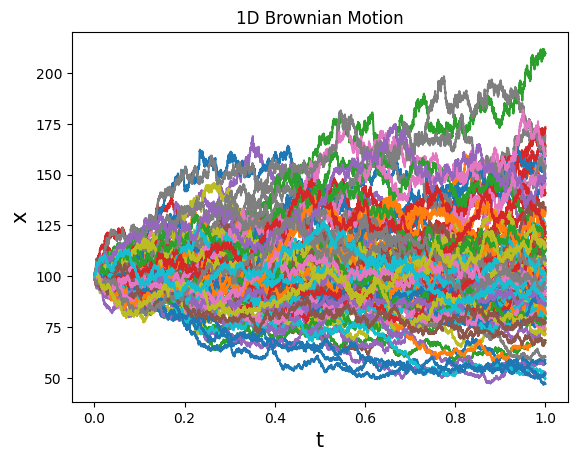

In [6]:
t = np.linspace(0.0, 1, 10000)
plt.plot(t,GBM.T )
plt.title('1D Brownian Motion')
plt.xlabel('t', fontsize=15)
plt.ylabel('x', fontsize=15)
plt.show()

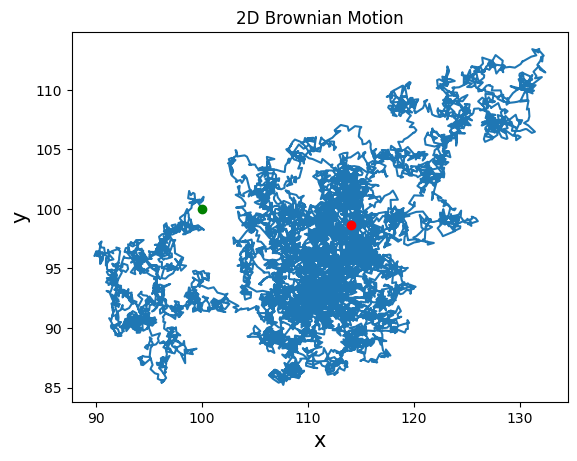

In [7]:
# Plot the 2D Geometric Brownian Motion.
plt.plot(GBM[0],GBM[1])
# Start and end points.
plt.plot(GBM[0,0],GBM[1,0], 'go')
plt.plot(GBM[0,-1], GBM[1,-1], 'ro')
plt.title('2D Brownian Motion')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.show()

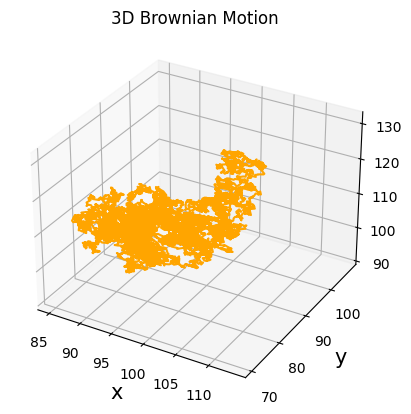

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d') #Projection plots
# Data for 3D Geomeotric Brownian Motion
zline = GBM[0]
xline = GBM[1]
yline = GBM[2]
ax.plot3D(xline, yline, zline, 'orange')
plt.title('3D Brownian Motion')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.show()